*Installing* pytorch

In [14]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 24.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.1+cu110
    Uninstalling torch-1.7.1+cu110:
      Successfully uninstalled torch-1.7.1+cu110
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.2+cu110
    Uninstalling torchvision-0.8.2+cu110:
      Successfully uninstalled torchvision-0.8.2+cu110
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.7.1+cu101 which is incompatible.


In [15]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [16]:
import torch, torchvision
from IPython.display import Image
from IPython.display import display

print(torch.__version__, torch.cuda.is_available())

1.7.1+cu110 True


Clone and Install from source

In [17]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 10.48 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [18]:
cd OneNet

/content/OneNet/OneNet


In [19]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/defaults.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/compat.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/config.py -> build/lib.linux-x86_64-3.7/detectron2/config
creating build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils/events.py -> build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils/memory.py -> build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils/comm.py -> build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils

Link coco dataset path

In [20]:
! mkdir -p datasets/coco/
! ln -s /path_to_coco_dataset/annotations datasets/coco/annotations
! ln -s /path_to_coco_dataset/train2017 datasets/coco/train2017
! ln -s /path_to_coco_dataset/val2017 datasets/coco/val2017

In [21]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1+cu110 True


Evaluate

In [22]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], resume=False)
[04/27 17:37:07 detectron2]: Rank of current process: 0. World size: 1
[04/27 17:37:08 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME             

In [23]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/toilet.jpg --output /content/image_1_result.jpg --confidence-threshold 0.1 \
    --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/tennis.jpg --output /content/image_2_result.jpg --confidence-threshold 0.2 \
    --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

[04/27 17:37:12 detectron2]: Arguments: Namespace(confidence_threshold=0.1, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/toilet.jpg'], opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], output='/content/image_1_result.jpg', video_input=None, webcam=False)
[04/27 17:37:15 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/model_onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][04/27 17:37:15 detectron2]: /content/toilet.jpg: detected 6 instances in 0.13s
100% 1/1 [00:00<00:00,  4.36it/s]
[04/27 17:37:16 detectron2]: Arguments: Namespace(confidence_threshold=0.2, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/tennis.jpg'], opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], output='/content/image_2_result.jpg', video_input=None, webcam=False)
[04/27 17:37:19 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/model_onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][04/27 17:37:19 detectro


Visualize

Image 1:

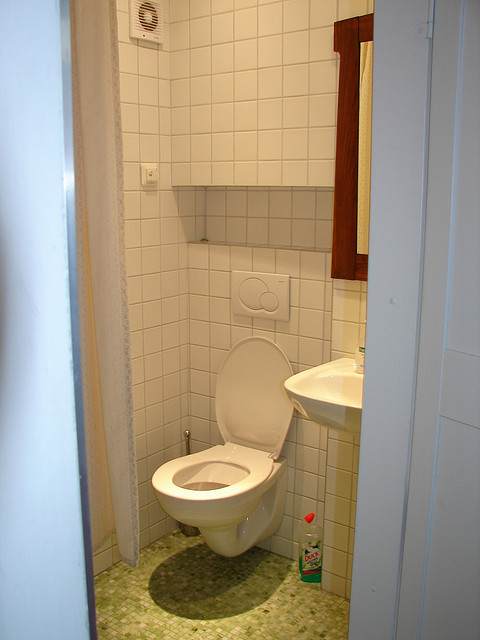

In [25]:
x = Image(filename='/content/toilet.jpg') 
display(x)

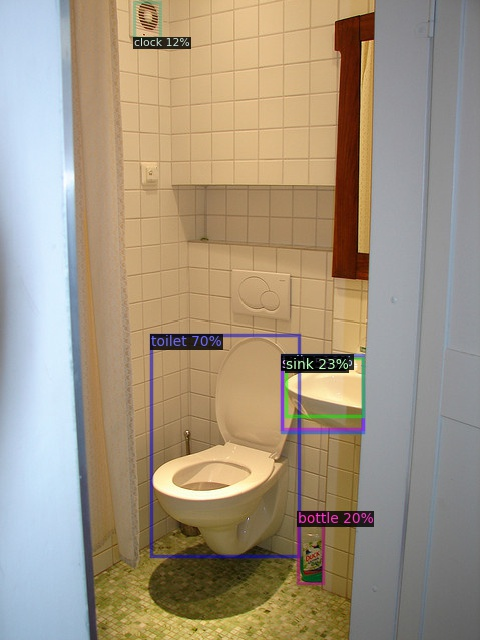

In [26]:
x = Image(filename='/content/image_1_result.jpg') 
display(x)

Image 2:

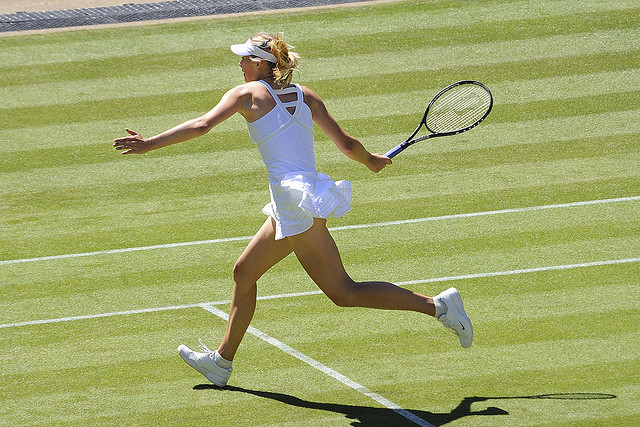

In [27]:
x = Image(filename='/content/tennis.jpg') 
display(x)

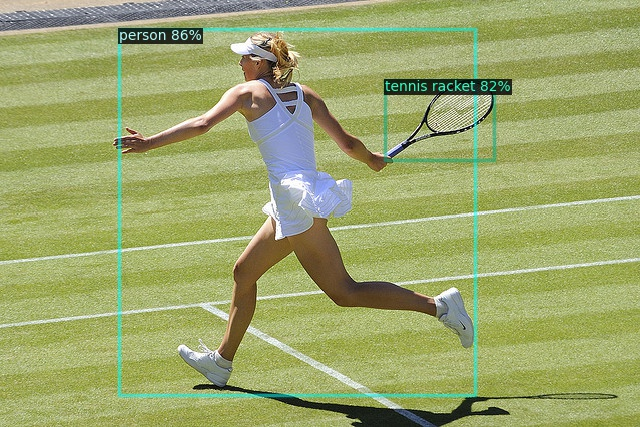

In [28]:
x = Image(filename='/content/image_2_result.jpg') 
display(x)